In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from sklearn.model_selection import train_test_split
import os
import time

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Dataset 

In [3]:
CSV = "TrainData.csv"
ImageDir = "_TrainData"
np.random.seed(0)

# Handling dataframe 

In [4]:
df = pd.read_csv(CSV)

In [5]:
df.head(2)

,Left,Center,Right,Steering,Acceleration,Brake,Speed,Time,X,Y,Z,RX,RY,RZ
0,left_2018_11_10_13_35_21_929.jpg,center_2018_11_10_13_35_21_929.jpg,right_2018_11_10_13_35_21_929.jpg,0.0,0.0,0.0,0,858.6843,15.51973,6.843736,109.0635,-0.002542,185.1764,0.000831
1,left_2018_11_10_13_35_21_996.jpg,center_2018_11_10_13_35_21_996.jpg,right_2018_11_10_13_35_21_996.jpg,0.0,0.0,0.0,0,858.7403,15.51973,6.843735,109.0635,-0.002546,185.1764,0.000816


# Dataset Visualization

In [6]:
visualY = df['Steering']
visualY = visualY * 10
visualY = np.asarray(visualY, dtype= np.int32)
unique, count = np.unique(visualY, return_counts =True)
print(np.asarray((unique, count)))

[[ -10   -9   -8   -7   -6   -5   -4   -3   -2   -1    0    1    2]
 [ 211    1    1   35  209  153  258  355  666 1827 6549  344   66]]


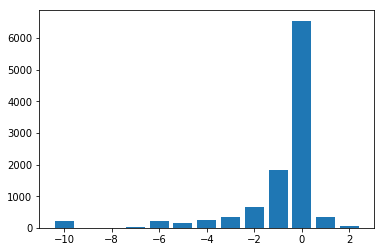

In [7]:
plt.bar(unique,count)
plt.show()

In [8]:
tempSet = df.loc[df['Steering'] <= -.2]

In [9]:
frames = [df, tempSet, tempSet,tempSet ,tempSet]
df = pd.concat(frames)
type(df)

pandas.core.frame.DataFrame

In [10]:
visualY = df['Steering']
visualY = visualY * 10
visualY = np.asarray(visualY, dtype= np.int32)
unique, count = np.unique(visualY, return_counts =True)
print(np.asarray((unique, count)))

[[ -10   -9   -8   -7   -6   -5   -4   -3   -2   -1    0    1    2]
 [1055    5    5  175 1045  765 1290 1775 3330 1827 6549  344   66]]


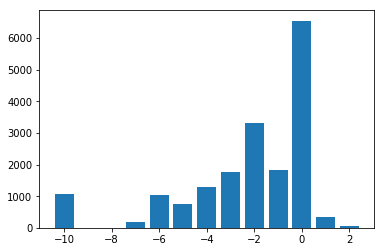

In [11]:
plt.bar(unique,count)
plt.show()

In [12]:
tempSet = df.loc[df['Steering'] < -.5]
tempSetPos = df.loc[df['Steering'] > 0]

In [13]:
frames = [df, tempSet,tempSetPos, tempSet,tempSetPos,tempSetPos,tempSetPos,tempSet]
df = pd.concat(frames)
visualY = df['Steering']
visualY = visualY * 10
visualY = np.asarray(visualY, dtype= np.int32)
unique, count = np.unique(visualY, return_counts =True)
print(np.asarray((unique, count)))

[[  -10    -9    -8    -7    -6    -5    -4    -3    -2    -1     0     1
      2]
 [ 4220    20    20   700  4180  2865  1290  1775  3330  1827 16617  1720
    330]]


In [14]:
X = df[['Left','Center','Right']]
Y = df['Steering']

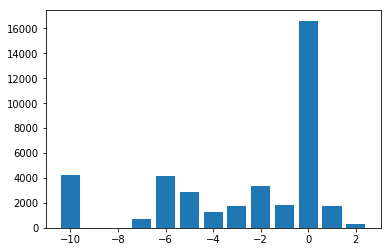

In [15]:
plt.bar(unique,count)
plt.show()

In [16]:
X = X.values
Y = Y.values
X.shape, Y.shape


((38894, 3), (38894,))

# Train test set

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, random_state = None, shuffle = True)

In [18]:
X_train.shape, y_train.shape

((31115, 3), (31115,))

In [19]:
X_test.shape, y_test.shape

((7779, 3), (7779,))

# Image details

In [20]:
height = 32
width = 32
channel = 3

# Common functions

In [21]:
def readImage(imageName):
    global ImageDir
    return mpimg.imread(os.path.join(ImageDir, imageName.strip()))

In [22]:
def getTrainBatch(batchSize,X,Y, isTraining):
    global height, width, channel
    
 
    indexRange = np.random.permutation(X.shape[0])
    
    currentIndex =0 
    
    images  = np.empty(shape =[batchSize, height,width,channel], dtype=np.float32)
    steer =  np.empty(shape = [batchSize,1],dtype=np.float32)
    
    for index in indexRange:
        
        
        if isTraining:
            choiceIndex = np.random.choice(3)
            _image = imageResize(readImage(X[index][choiceIndex]))
            
            if choiceIndex ==0:
                steer[currentIndex] = (Y[index] + 0.2)
            elif choiceIndex ==1:
                steer[currentIndex] = Y[index]
            else:
                steer[currentIndex] = (Y[index] - 0.2)
        
        else:
            _image= imageResize(readImage(X[index][1]))
            steer[currentIndex] = Y[index]
            
            
            
        
        images[currentIndex] = (_image/127.5) -1 
        
        
        
        currentIndex = currentIndex+1
        if currentIndex == batchSize:
            break
        
    return images,steer
        
    

In [23]:
def imageResize(image):
    global height, width
    return cv2.resize(image, (width, height), cv2.INTER_AREA)

# Graph Parameters

In [24]:
conv1_filters = 32
conv1_kSize = 5
conv1_strides = 1
conv1_padding = 'SAME'

In [25]:
conv2_filters = 32
conv2_kSize = 5
conv2_strides = 2
conv2_padding = 'SAME'

In [26]:
conv3_filters = 64
conv3_kSize = 5
conv3_strides = 2
conv3_padding = 'SAME'

In [27]:
conv4_filters = 64
conv4_kSize = 3
conv4_strides = 2
conv4_padding = 'SAME'

In [28]:
conv5_filters = 64
conv5_kSize = 3
conv5_strides = 1
conv5_padding = 'SAME'

In [29]:
dense1_filter = 1000

In [30]:
dense2_filter = 128

In [31]:
output_unit = 1

In [32]:
tf.reset_default_graph()

# Placeholders

In [33]:
X = tf.placeholder(tf.float32, shape=[None, height, width, channel], name = 'X_Placeholder')
Y = tf.placeholder(tf.float32, shape=[None,1], name = 'Y_Placeholder')
X, Y

(<tf.Tensor 'X_Placeholder:0' shape=(?, 32, 32, 3) dtype=float32>,
 <tf.Tensor 'Y_Placeholder:0' shape=(?, 1) dtype=float32>)

## Graph

In [34]:
conv1 = tf.layers.conv2d(inputs = X, filters = conv1_filters, kernel_size = conv1_kSize, strides = conv1_strides, padding = conv1_padding)
conv1

<tf.Tensor 'conv2d/BiasAdd:0' shape=(?, 32, 32, 32) dtype=float32>

In [35]:
conv2 = tf.layers.conv2d(inputs = conv1, filters = conv2_filters, kernel_size = conv2_kSize, strides = conv2_strides, padding = conv2_padding)
conv2

<tf.Tensor 'conv2d_1/BiasAdd:0' shape=(?, 16, 16, 32) dtype=float32>

In [36]:
conv3 = tf.layers.conv2d(inputs = conv2, filters = conv3_filters, kernel_size = conv3_kSize, strides = conv3_strides, padding = conv3_padding)
conv3

<tf.Tensor 'conv2d_2/BiasAdd:0' shape=(?, 8, 8, 64) dtype=float32>

In [37]:
conv4 = tf.layers.conv2d(inputs = conv3, filters = conv4_filters, kernel_size = conv4_kSize, strides = conv4_strides, padding = conv4_padding, name="conv4")
conv4

<tf.Tensor 'conv4/BiasAdd:0' shape=(?, 4, 4, 64) dtype=float32>

In [38]:
conv5 = tf.layers.conv2d(inputs = conv4, filters = conv5_filters, kernel_size = conv5_kSize, strides = conv5_strides, padding = conv5_padding, name="conv5")
conv5

<tf.Tensor 'conv5/BiasAdd:0' shape=(?, 4, 4, 64) dtype=float32>

In [39]:
flatten = tf.reshape(conv5, shape =[-1, conv5.shape[1].value * conv5.shape[2].value * conv5.shape[3].value])
flatten

<tf.Tensor 'Reshape:0' shape=(?, 1024) dtype=float32>

In [40]:
dense1 = tf.layers.dense(inputs = flatten, units = dense1_filter, activation = tf.nn.elu)
dense1

<tf.Tensor 'dense/Elu:0' shape=(?, 1000) dtype=float32>

In [41]:
dense2 =tf.layers.dense(inputs = dense1, units = dense2_filter, activation = tf.nn.elu)
dense2

<tf.Tensor 'dense_1/Elu:0' shape=(?, 128) dtype=float32>

In [42]:
output = tf.layers.dense(inputs = dense2, units = output_unit)
output

<tf.Tensor 'dense_2/BiasAdd:0' shape=(?, 1) dtype=float32>

In [43]:
Y.shape, output.shape

(TensorShape([Dimension(None), Dimension(1)]),
 TensorShape([Dimension(None), Dimension(1)]))

In [44]:
loss = tf.losses.mean_squared_error(labels = Y, predictions = output)

In [45]:
optimizer = tf.train.AdamOptimizer()

In [46]:
train = optimizer.minimize(loss)

In [47]:
saver = tf.train.Saver()

In [48]:
init = tf.global_variables_initializer()

# Hyperparameters

In [49]:
totalEpochs = 10
batchSize = 32
totalSets = (int)(len(X_train)/ batchSize)


totalSets

972

In [50]:
#graphs
TrainingLossArray = np.empty(shape=[totalEpochs],dtype = np.float32)
TestLossArray = np.empty(shape=[totalEpochs],dtype = np.float32)


# Training

In [52]:
a = (int)(time.time() * 10000) + np.random.randint(100,size=1)


with tf.Session() as sess:
    sess.run(init)
    
    
    
    
    for epoch in range(totalEpochs):
        
        currentIndex = 0
        print("Epoch {0} started.......................".format(epoch))
        
        for index in range(totalSets):
            x, y = getTrainBatch(batchSize, X_train, y_train, True)
            sess.run(train,feed_dict = {X:x, Y:y})
            _loss = sess.run(loss,feed_dict = {X:x, Y:y})
            if index % 100 == 0:
                print("     Completed count {0} and Loss : {1}".format(index,_loss))
                
        print("     --------------------------------------------------------------------------------")        
        print("     Trainign loss {0} ".format(_loss))
        TrainingLossArray[epoch] = _loss
        
        x, y = getTrainBatch(batchSize, X_test, y_test, False)
        _loss = sess.run(loss,feed_dict = {X:x, Y:y})
        print("     Test loss {0} ".format(_loss))
        TestLossArray[epoch] = _loss
        modelName = "model/Model_" + str(a[0]) +"_____" + str(epoch)
        saver.save(sess,modelName)
        print("Model saved : ", modelName)
        
 
    x, y = getTrainBatch(1000, X_test, y_test, False)
    _yPred = sess.run(output,feed_dict = {X:x, Y:y}) 
    _loss = sess.run(loss,feed_dict = {X:x, Y:y})
    
    
    print("     Test loss {0}".format(_loss))
    
    
    saver.save(sess,modelName)
        
        
    print("Completed")
    

Epoch 0 started.......................
     Completed count 0 and Loss : 5.957803726196289
     Completed count 100 and Loss : 0.03394746035337448
     Completed count 200 and Loss : 0.03969404101371765
     Completed count 300 and Loss : 0.03363872691988945
     Completed count 400 and Loss : 0.018486790359020233
     Completed count 500 and Loss : 0.037606559693813324
     Completed count 600 and Loss : 0.029704757034778595
     Completed count 700 and Loss : 0.014800004661083221
     Completed count 800 and Loss : 0.025718403980135918
     Completed count 900 and Loss : 0.011952178552746773
     --------------------------------------------------------------------------------
     Trainign loss 0.022728394716978073 
     Test loss 0.02102157473564148 
Model saved :  model/Model_15425395460637_____0
Epoch 1 started.......................
     Completed count 0 and Loss : 0.018008362501859665
     Completed count 100 and Loss : 0.025861207395792007
     Completed count 200 and Loss : 0

Completed


# Training loss 

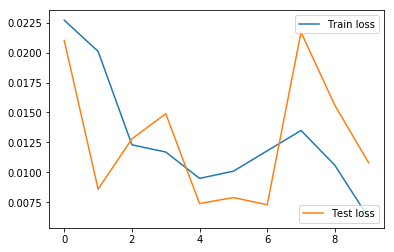

In [54]:
_trainLoss = np.around(TrainingLossArray, decimals=4)
_testLoss = np.around(TestLossArray, decimals=4)
line1, = plt.plot(_trainLoss, label='Train loss')
line2, = plt.plot(_testLoss, label='Test loss')
first_legend = plt.legend(handles=[line1], loc =1)
ax = plt.gca().add_artist(first_legend)
plt.legend(handles=[line2], loc =4)
plt.show()

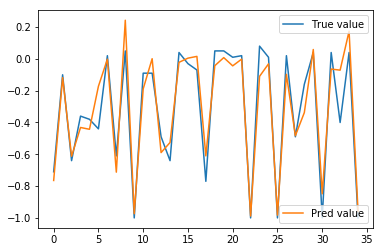

In [55]:
startPoint = 70
line1, =  plt.plot(y[startPoint:startPoint+35], label='True value')
line2, =  plt.plot(_yPred[startPoint:startPoint+35],label='Pred value')
first_legend = plt.legend(handles=[line1], loc =1)
ax = plt.gca().add_artist(first_legend)
plt.legend(handles=[line2], loc =4)
plt.savefig("graph1.jpg")


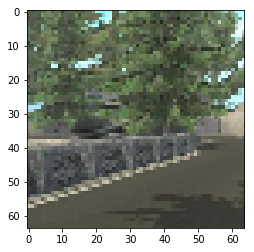

In [36]:
plt.imshow(imageResize(readImage(X_train[900][0])))

In [32]:
a.shape

NameError: name 'a' is not defined

In [ ]:
b.shape